In [66]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import  SGD
from tensorflow.keras.utils import  to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [68]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [69]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [70]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

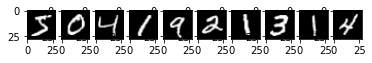

In [71]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_images[i],'gray')

plt.show()

In [72]:
train_images = train_images.reshape(train_images.shape[0],784)
test_images = test_images.reshape(test_images.shape[0],784)

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [73]:
print(train_labels[0])
print(test_labels[0])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])
print(test_labels[0])

print(train_labels.shape)
print(test_labels.shape)




5
7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)
(10000, 10)


In [74]:
model = Sequential()
model.add(Dense(256,activation='sigmoid',input_shape=(784,)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.1),metrics=['acc'])

In [78]:
history = model.fit(train_images,train_labels,batch_size=500,epochs=5,validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 0s 3ms/step - loss: 1.7204 - acc: 0.4386 - val_loss: 0.9869 - val_acc: 0.8372
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.9405 - acc: 0.7352 - val_loss: 0.5872 - val_acc: 0.8889
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.6710 - acc: 0.8185 - val_loss: 0.4379 - val_acc: 0.9020
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.5446 - acc: 0.8531 - val_loss: 0.3628 - val_acc: 0.9105
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.4761 - acc: 0.8684 - val_loss: 0.3257 - val_acc: 0.9147


In [79]:
print(history.history)

{'loss': [1.7204288244247437, 0.9404687285423279, 0.6709786653518677, 0.5446053147315979, 0.4761408567428589], 'acc': [0.4385625123977661, 0.7352499961853027, 0.8184583187103271, 0.8530833125114441, 0.8683541417121887], 'val_loss': [0.9869463443756104, 0.5872405171394348, 0.43786510825157166, 0.3628358840942383, 0.3257294297218323], 'val_acc': [0.8371666669845581, 0.8889166712760925, 0.9020000100135803, 0.9104999899864197, 0.9147499799728394]}


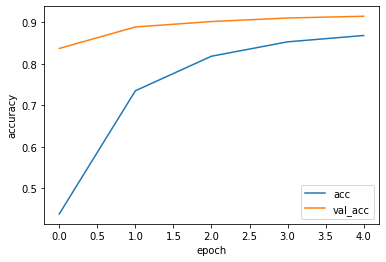

In [80]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()


In [81]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss,test_acc))

313/313 [==============================] - 0s 612us/step - loss: 0.3312 - acc: 0.9151
loss: 0.331
acc: 0.915


In [83]:
test_predictions = model.predict(test_images[0:1])
print([round(i,4) for i in test_predictions[0].tolist()])

test_predictions = np.argmax(test_predictions,axis=1)
print(test_predictions[0])

[0.0004, 0.0003, 0.0007, 0.0043, 0.0003, 0.0015, 0.0, 0.9798, 0.0003, 0.0124]
7


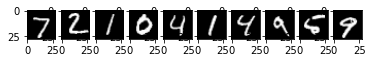

[7 2 1 0 4 1 4 9 6 9]


In [87]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(test_images[i].reshape((28,28)),'gray')

plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions,axis=1)
print(test_predictions)

